In [2]:
import re
from urllib import request
import random

In [3]:
class Crawler:
    
    def __init__(self,
                 page_number,
                 user_agent_list,
                 proxy_list):
        
        self.page_number=page_number
        self.user_agent_list=user_agent_list
        self.proxy_list=proxy_list
        self.default_user_agent=self.user_agent_list[0]
    
    def user_agent(self):
        return random.choice(user_agent_list)
    
    def user_proxy(self):
        return random.choice(proxy_list)
    
    ## The fast download function uses fixed User-Agent and fixed Ip address
    ## It may occur failure of Crawler task for high frequency sending request to server
    ## However, here I put some commands(functions) between each time of request in the loop of
    ## for i in range(1,cwl_first_name.page_number+1):
    ## Thus, this request is not high frequency. So you can use this simple one 
    def fast_download_html(self,url): 
        headers = {'Accept': '*/*',
               'Accept-Language': 'en-US,en;q=0.8',
               'Cache-Control': 'max-age=0',
               'User-Agent':self.default_user_agent,
               'Connection': 'keep-alive',
                   }
        response=request.Request(url,headers=headers)
        html=request.urlopen(response).read().decode('utf-8')
        return html 
    
    
    ## The download function uses random proxy IP address and user_agent, so it is much safe
    ## But I have to maintain the proxy_list in which many IP address may out of date in the future
    ## The four Ip address in proxy_list are available when I run the crawler
    def download_html(self,url):
        proxy={'http':self.user_proxy()}
        proxy_support =request.ProxyHandler(proxy)
        opener = request.build_opener(proxy_support)
        request.install_opener(opener)
        user_agent=self.user_agent()
        headers = {'Accept': '*/*',
                   'Accept-Language': 'en-US,en;q=0.8',
                   'Cache-Control': 'max-age=0',
                   'User-Agent':user_agent ,
                   'Connection': 'keep-alive',
                   }
        response=request.Request(url,headers=headers)
        html=request.urlopen(response).read().decode('utf-8')
        print('done')
        return html
    
    ## search the all names from one page
    def scrap_name(self,html):   
        pattern='result=[0-9]*">[a-z]+'
        all_name=re.findall(pattern,html,re.I)
        all_name=list(map(lambda x: re.search('[A-Z][a-z]*',x).group(),all_name))
        return all_name

    
##########
##Main####
##########

user_agent_list = [
"Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; AcooBrowser; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
"Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0; Acoo Browser; SLCC1; .NET CLR 2.0.50727; Media Center PC 5.0; .NET CLR 3.0.04506)",
"Mozilla/4.0 (compatible; MSIE 7.0; AOL 9.5; AOLBuild 4337.35; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
"Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US)",
"Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Win64; x64; Trident/5.0; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 2.0.50727; Media Center PC 6.0)",
"Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 1.0.3705; .NET CLR 1.1.4322)",
"Mozilla/4.0 (compatible; MSIE 7.0b; Windows NT 5.2; .NET CLR 1.1.4322; .NET CLR 2.0.50727; InfoPath.2; .NET CLR 3.0.04506.30)",
"Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN) AppleWebKit/523.15 (KHTML, like Gecko, Safari/419.3) Arora/0.3 (Change: 287 c9dfb30)",
"Mozilla/5.0 (X11; U; Linux; en-US) AppleWebKit/527+ (KHTML, like Gecko, Safari/419.3) Arora/0.6",
"Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.8.1.2pre) Gecko/20070215 K-Ninja/2.1.1",
"Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN; rv:1.9) Gecko/20080705 Firefox/3.0 Kapiko/3.0",
"Mozilla/5.0 (X11; Linux i686; U;) Gecko/20070322 Kazehakase/0.4.5",
"Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.8) Gecko Fedora/1.9.0.8-1.fc10 Kazehakase/0.5.6",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.56 Safari/535.11",
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.20 (KHTML, like Gecko) Chrome/19.0.1036.7 Safari/535.20",
"Opera/9.80 (Macintosh; Intel Mac OS X 10.6.8; U; fr) Presto/2.9.168 Version/11.52",
]
proxy_list = ['138.219.229.239:80',
             '77.242.105.88:80',
             '171.97.103.31:80',
             '89.40.115.70:80']
c=Crawler(1,user_agent_list,proxy_list)

In [4]:
url_svd=[]
url_svd.append('https://en.wikipedia.org/wiki/Singular_value_decomposition')
url_svd.append('https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/')
url_svd.append('https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/')
url_svd.append('https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/')
url_svd.append('https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254')
url_svd

['https://en.wikipedia.org/wiki/Singular_value_decomposition',
 'https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/',
 'https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/',
 'https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/',
 'https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254']

In [5]:
html_svd=[c.download_html(url) for url in url_svd]

done
done
done
done
done


In [6]:
url_nmf=[]
url_nmf.append('https://en.wikipedia.org/wiki/Non-negative_matrix_factorization')
url_nmf.append('https://mlexplained.com/2017/12/28/a-practical-introduction-to-nmf-nonnegative-matrix-factorization/')
url_nmf.append('https://blog.acolyer.org/2019/02/18/the-why-and-how-of-nonnegative-matrix-factorization/')
url_nmf.append('https://medium.com/logicai/non-negative-matrix-factorization-for-recommendation-systems-985ca8d5c16c')
url_nmf.append('https://yliapis.github.io/Non-Negative-Matrix-Factorization/')
url_nmf

['https://en.wikipedia.org/wiki/Non-negative_matrix_factorization',
 'https://mlexplained.com/2017/12/28/a-practical-introduction-to-nmf-nonnegative-matrix-factorization/',
 'https://blog.acolyer.org/2019/02/18/the-why-and-how-of-nonnegative-matrix-factorization/',
 'https://medium.com/logicai/non-negative-matrix-factorization-for-recommendation-systems-985ca8d5c16c',
 'https://yliapis.github.io/Non-Negative-Matrix-Factorization/']

In [7]:
html_nmf=[c.download_html(url) for url in url_nmf]

done
done
done
done
done


In [8]:
url_lda=[]
url_lda.append('https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation')
url_lda.append('https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d')
url_lda.append('https://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/')
url_lda.append('https://jamesmccaffrey.wordpress.com/2018/05/14/latent-dirichlet-allocation-what-is-it/')
url_lda.append('https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/')
url_lda

['https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation',
 'https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d',
 'https://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/',
 'https://jamesmccaffrey.wordpress.com/2018/05/14/latent-dirichlet-allocation-what-is-it/',
 'https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/']

In [9]:
html_lda=[c.download_html(url) for url in url_lda]

done
done
done
done
done


In [10]:
url_bank=[]
url_bank.append('https://www.investopedia.com/terms/b/business-banking.asp')
url_bank.append('https://www.fundera.com/blog/best-bank-for-small-business')
url_bank.append('https://www.usbank.com/business.html')
url_bank.append('https://en.wikipedia.org/wiki/Bank')
url_bank.append('https://smallbusiness.chron.com/difference-between-corporate-commercial-banking-62835.html')
url_bank

['https://www.investopedia.com/terms/b/business-banking.asp',
 'https://www.fundera.com/blog/best-bank-for-small-business',
 'https://www.usbank.com/business.html',
 'https://en.wikipedia.org/wiki/Bank',
 'https://smallbusiness.chron.com/difference-between-corporate-commercial-banking-62835.html']

In [11]:
html_bank=[c.download_html(url) for url in url_bank]

done
done
done
done
done


In [ ]:
url=[,]

In [12]:
html_doc=[]
html_doc.extend(html_nmf)
html_doc.extend(html_lda)
html_doc.extend(html_bank)
html_doc.extend(html_svd)

In [13]:
len(html_doc)

20

In [14]:
def extract_title(html):
    title=re.search('<title.*?>[^<>]+</title>',html).group()
    title=re.sub('<.*?>','',title)
    return title

html_title=[extract_title(i) for i in html_doc]

In [15]:
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import split_alphanum
from gensim.parsing.preprocessing import stem_text
from gensim.parsing.preprocessing import strip_numeric
from gensim.parsing.preprocessing import strip_punctuation
#from gensim.parsing.preprocessing import strip_short
from gensim.parsing.preprocessing import strip_tags
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import preprocess_string
from gensim import utils
def strip_short(s, minsize=2):
    s = utils.to_unicode(s)
    return " ".join(e for e in s.split() if len(e) >= minsize)

CUSTOM_FILTERS = [
                  strip_tags, 
                  split_alphanum,
                  strip_punctuation,
                  strip_numeric,
                  stem_text,
                  strip_short,
                  remove_stopwords
                  ]

final_doc=[preprocess_string(i,CUSTOM_FILTERS) for i in html_title]

D:\anaconda3\envs\tensorflow\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
D:\anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
len(final_doc)

20

In [27]:
def count_vect(data):
        count=CountVectorizer()
        sentence=[' '.join(i) for i in data]
        count_mat=count.fit_transform(sentence)
        return count_mat,count.get_feature_names()
data,feature=count_vect(final_doc)

In [46]:
a=[ 6, 25, 39, 41, 46, 54]
[feature[i] for i in a]

['busi', 'introduct', 'neg', 'non', 'python', 'svd']

In [45]:
np.where(np.sum(data.toarray(),axis=0)==3)

(array([ 6, 25, 39, 41, 46, 54], dtype=int64),)

In [44]:
np.sum(data.toarray(),axis=0)

array([4, 1, 2, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 4, 1, 2, 1, 1,
       5, 1, 2, 3, 1, 1, 4, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 3, 1, 3, 2, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 5, 1, 3, 1, 1, 5, 4], dtype=int64)

100%|██████████████████████████████████████████| 10/10 [00:01<00:00,  6.86it/s]


Kmeans running time:1.041067 sec!
SVD running time:0.153007 sec!
PCA running time:0.001000 sec!


100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 166.66it/s]


NMF running time:0.065001 sec!


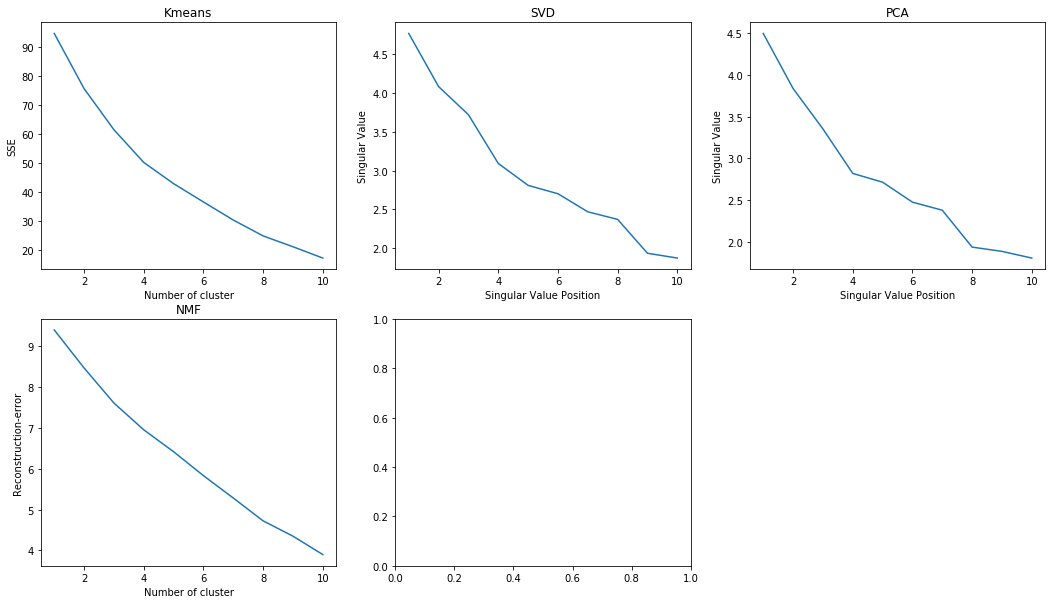

TypeError: cannot unpack non-iterable NoneType object

In [48]:
k,svd,p,n=s.sub_plot_K(data,10)

In [53]:
real_label=[0]*5
real_label.extend([1]*5)
real_label.extend([2]*5)
real_label.extend([3]*5)
s.conf_mat(data,4,real_label)

*********K-means*********
[[5 0 0 0]
 [0 0 4 1]
 [0 0 0 5]
 [0 5 0 0]]
*********NMF*************
[[0 5 0 0]
 [0 0 5 0]
 [0 0 0 5]
 [5 0 0 0]]
*********PCA*************
[[0 5 0 0]
 [4 0 1 0]
 [0 0 5 0]
 [0 0 0 5]]
*********SVD**************
[[0 0 0 5]
 [0 1 4 0]
 [0 5 0 0]
 [5 0 0 0]]
*********LDA**************
[[1 1 0 3]
 [1 1 2 1]
 [2 0 2 1]
 [2 1 1 1]]


In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
from scipy.sparse import issparse
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
%matplotlib inline
#feature and dimension expand, why?
#what if we only use original features?
#Assume we have five orignal features: amt, paymtd, paytype, RecorPay, beneficiary
#dictionary for each feature is as following, all features are categorical data:
##Amt:0-9 (Amount of each txn)
##Paymtd:0-9 (payment method of each txn)
##Paytype:0-9 (payment type of each txn)
##RecorPay:0-9 (receive or pay type of each txn)
##bene:0-9 (beneficiary of each txn)

class Sythetic:
    def __init__(self):
        print('Sythetic instance has been created!')
        
    def Kmeans(self,data,K,plt):
        sse = {}
        t0=time()
        for k in tqdm(range(1, K+1)):
            kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
            sse[k] = kmeans.inertia_ 
        t1=time()
        plt.plot(list(sse.keys()), list(sse.values()))
        plt.set_title('Kmeans')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("SSE")
        print('Kmeans running time:%f sec!'%(t1-t0))
        return sse
        
    def SVD(self,data,K,plt):
        t0=time()
        svd=TruncatedSVD(n_components=K,n_iter=500,random_state=0)
        svd.fit(data)
        sigma=svd.singular_values_
        t1=time()
        x=[i for i in range(1,K+1)]
        plt.plot(x,sigma)
        plt.set_title('SVD')
        plt.set_xlabel("Singular Value Position")
        plt.set_ylabel("Singular Value")
        print('SVD running time:%f sec!'%(t1-t0))
        return sigma, svd.explained_variance_ratio_,svd.explained_variance_ratio_.sum()
        
    
    def PCA(self,data,K,plt):
        sparse=issparse(data)
        t0=time()
        pca = PCA(n_components=K)
        if sparse:
            pca.fit(data.toarray())
        else:
            pca.fit(data)
        sigma=pca.singular_values_
        t1=time()
        x=[i for i in range(1,K+1)]
        plt.plot(x,sigma)
        plt.set_title('PCA')
        plt.set_xlabel("Singular Value Position")
        plt.set_ylabel("Singular Value")
        print('PCA running time:%f sec!'%(t1-t0))
        return sigma, pca.explained_variance_ratio_,pca.explained_variance_ratio_.sum()
        
    def NMF(self,data,K,plt):
        re = {}
        t0=time()
        for k in tqdm(range(1, K+1)):
            nmf = NMF(n_components=k, max_iter=1000).fit(data)
            re[k] = nmf.reconstruction_err_  
        t1=time()
        plt.plot(list(re.keys()), list(re.values()))
        plt.set_title('NMF')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("Reconstruction-error")
        print('NMF running time:%f sec!'%(t1-t0))
        return re
    
    def LDA(self,data,K,plt):
        t0=time()
        coherence_values = []
        data=[[str(word) for word in doc] for doc in data]
        id2word=corpora.Dictionary(data)
        corpus = [id2word.doc2bow(text) for text in data]
        for num_topics in tqdm(range(1,K+1)):
            model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=num_topics, 
                                                   random_state=0,
                                                   update_every=1,
                                                   alpha='auto',
                                                   per_word_topics=True)
            coherencemodel = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
            coherence_values.append(coherencemodel.get_coherence())
        t1=time()
        x=[i for i in range(1,K+1)]
        plt.plot(x,coherence_values)
        plt.set_title('LDA')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("Coherence score")
        print('LDA running time:%f sec!'%(t1-t0))
        return coherence_values

    def Kmeans_pred(self,data,K,real_label):
        kmeans=KMeans(n_clusters=K,max_iter=1000)
        kmeans_pred=kmeans.fit_predict(data)
        conf_mat=confusion_matrix(real_label,kmeans_pred)
        return kmeans_pred,conf_mat
    
    def NMF_pred(self,data,K,real_label):
        nmf=NMF(n_components=K, max_iter=1000)
        W=nmf.fit_transform(data)
        nmf_pred=[np.argmax(i) for i in W]
        conf_mat=confusion_matrix(real_label,nmf_pred)
        return nmf_pred,conf_mat
    
    def LDA_pred(self,data,K,real_label):
        data=[[str(word) for word in doc] for doc in data]
        id2word=corpora.Dictionary(data)
        corpus = [id2word.doc2bow(text) for text in data]
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=K, 
                                               random_state=0,
                                               update_every=1,
                                               alpha='auto',
                                               per_word_topics=True)
        topic_dist=model.get_document_topics(corpus)
        topic_dist=[list(zip(*i))[1] for i in list(topic_dist)]
        LDA_pred=[np.argmax(np.array(i)) for i in topic_dist]
        conf_mat=confusion_matrix(real_label,LDA_pred)
        return LDA_pred,conf_mat
    
    def sub_plot_K(self,data,K):
        fig = plt.figure(figsize=(18,10))
        ax1=fig.add_subplot(231)
        self.Kmeans(data,K,ax1)
        ax2=fig.add_subplot(232)
        self.SVD(data,K,ax2)
        ax3=fig.add_subplot(233)
        self.PCA(data,K,ax3)
        ax4=fig.add_subplot(234)
        self.NMF(data,K,ax4)
        ax5=fig.add_subplot(235)
        #self.LDA(data,K,ax5)
        plt.show()
        
    def conf_mat(self,data,K,real_label):
        print('*********K-means*********')
        print(self.Kmeans_pred(data,K,real_label)[1])
        print('*********NMF*************')
        print(self.NMF_pred(data,K,real_label)[1])
        print('*********PCA*************')
        sparse=issparse(data)
        if sparse:
            print(self.Kmeans_pred(PCA(K).fit_transform(data.toarray()),K,real_label)[1])
        else:
            print(self.Kmeans_pred(PCA(K).fit_transform(data),K,real_label)[1])
        print('*********SVD**************')
        print(self.Kmeans_pred(TruncatedSVD(K).fit_transform(data),K,real_label)[1])
        print('*********LDA**************')
        print(self.LDA_pred(data,K,real_label)[1])
        
s=Sythetic()

Sythetic instance has been created!
